In [813]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score, fbeta_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

# Data Preparation

In [814]:
heartAtk = pd.read_csv("./heart_attack_prediction_dataset.csv")
heartAtk.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [815]:
heartAtk.shape

(8763, 26)

In [816]:
heartAtk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [817]:
heartAtk.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [818]:
# Removal of irrelevant variables for the objective in question.

columns_to_drop=['Patient ID','Hemisphere','Continent']
heartAtk_clean_version1 = heartAtk.drop(columns_to_drop,axis=1)

In [819]:
heartAtk_clean_version1.shape

(8763, 23)

In [820]:
heartAtk_clean_version1.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


Nenhum valor nulo detetado.


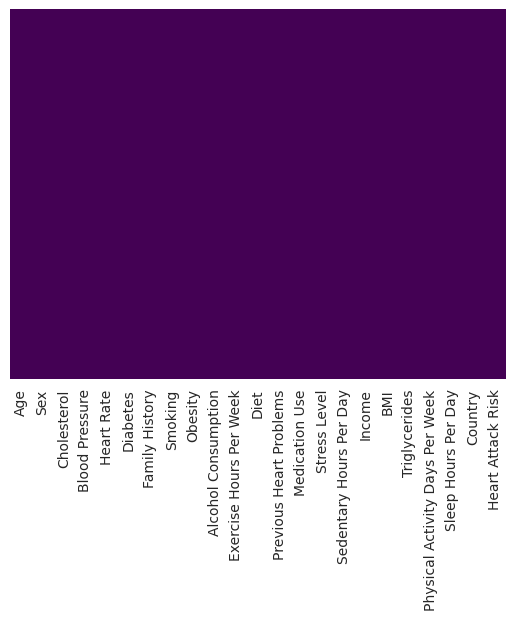

In [821]:
# Elimination of null values in the dataset.

heartAtk_clean_version1.isna().any()
sns.heatmap(heartAtk_clean_version1.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print("Nenhum valor nulo detetado.")

In [822]:
# Elimination of duplicate values in the dataset.

heartAtk_clean_version1.duplicated().sum()
heartAtk_clean_version1.drop_duplicates(inplace=True)
heartAtk_clean_version1.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,0,9,6.615001,261404,31.251233,286,0,6,Argentina,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,0,1,4.963459,285768,27.194973,235,1,7,Canada,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,1,9,9.463426,235282,28.176571,587,4,4,France,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,0,9,7.648981,125640,36.464704,378,3,4,Canada,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,0,6,1.514821,160555,21.809144,231,1,5,Thailand,0


In [823]:
# Separation of Blood Pressure into Systolic Pressure and Diastolic Pressure.

def string_int_systolic(string):
    parts = string.split('/')
    return int(parts[0])

def string_int_diastolic(string):
    parts = string.split('/')
    return int(parts[1])


heartAtk_clean_version2 = pd.DataFrame(heartAtk_clean_version1)
heartAtk_clean_version2['Systolic Pressure'] = heartAtk_clean_version2['Blood Pressure'].apply(string_int_systolic)
heartAtk_clean_version2['Diastolic Pressure'] = heartAtk_clean_version2['Blood Pressure'].apply(string_int_diastolic)


***Blood Pressure Values by category***

Follows the specific format: Category/Systolic Pressure/Diastolic Pressure:

**Normal** : less than 120 and less than 80

**Elevated** : 120-129 and less than 80

**High Blood Pressure (Hypertension) Stage 1** : 130-139 or 80-89

**High Blood Pressure (Hypertension) Stage 2** : 140 or higher or 90 or higher

**Hypertensive Crisis :** higher than 180 and/or higher than 120

**Relevant age groups:** 18-39 ; 40-59; 60+

In [824]:
labels = ['18-39', '40-59', '60+']
bins = [18, 39, 59, 110]

# Create 'Age Group' column
heartAtk_clean_version2['Age Group'] = pd.cut(heartAtk_clean_version2['Age'], bins=bins, labels=labels, right=False)

# Group by 'Age Group' and 'Sex'
grouped = heartAtk_clean_version2.groupby(['Age Group', 'Sex'])

# Get specific groups (e.g., males and females in the 18-39 age group)
age_group_1839_men = grouped.get_group(('18-39', 'Male'))
age_group_1839_women = grouped.get_group(('18-39', 'Female'))

# Similarly, you can retrieve other age groups and sex-specific groups
age_group_4059_men = grouped.get_group(('40-59', 'Male'))
age_group_4059_women = grouped.get_group(('40-59', 'Female'))

age_group_60over_men = grouped.get_group(('60+', 'Male'))
age_group_60over_women = grouped.get_group(('60+', 'Female'))

age_group_1839_men.head()

/tmp/ipykernel_4420/964467711.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = heartAtk_clean_version2.groupby(['Age Group', 'Sex'])


,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,Systolic Pressure,Diastolic Pressure,Age Group
1,21,Male,389,165/93,98,1,1,1,1,1,...,285768,27.194973,235,1,7,Canada,0,165,93,18-39
8,20,Male,145,144/105,68,1,0,1,1,0,...,25086,35.809901,790,7,4,Brazil,0,144,105,18-39
17,38,Male,166,120/74,56,1,0,1,1,0,...,48376,29.517388,402,0,6,Thailand,0,120,74,18-39
24,36,Male,133,161/90,97,1,0,1,1,1,...,223132,22.386804,605,5,10,Canada,0,161,90,18-39
31,25,Male,197,178/72,45,0,1,1,0,1,...,59634,18.522199,661,0,6,Spain,0,178,72,18-39


In [825]:
mean_age39_systolic_men = age_group_1839_men['Systolic Pressure'].mean()
mean_age39_diastolic_men = age_group_1839_men['Diastolic Pressure'].mean()

mean_age39_systolic_women = age_group_1839_women['Systolic Pressure'].mean()
mean_age39_diastolic_women = age_group_1839_women['Diastolic Pressure'].mean()

mean_age59_systolic_men = age_group_4059_men['Systolic Pressure'].mean()
mean_age59_diastolic_men = age_group_4059_men['Diastolic Pressure'].mean()

mean_age59_systolic_women = age_group_4059_women['Systolic Pressure'].mean()
mean_age59_diastolic_women = age_group_4059_women['Diastolic Pressure'].mean()

mean_age60over_systolic_men = age_group_60over_men['Systolic Pressure'].mean()
mean_age60over_diastolic_men = age_group_60over_men['Diastolic Pressure'].mean()

mean_age60over_systolic_women = age_group_60over_women['Systolic Pressure'].mean()
mean_age60over_diastolic_women = age_group_60over_women['Diastolic Pressure'].mean()


print("Blood pressure means on men (age group 18-39) :\n Systolic %f Diastolic %f" %(mean_age39_systolic_men, mean_age39_diastolic_men) )
print("Blood pressure means on women (age group 18-39) :\n Systolic %f Diastolic %f\n" %(mean_age39_systolic_women, mean_age39_diastolic_women) )

print("Blood pressure means on men (age group 40-59) :\n Systolic %f Diastolic %f" %(mean_age59_systolic_men, mean_age59_diastolic_men) )
print("Blood pressure means on women (age group 40-59) :\n Systolic %f Diastolic %f\n" %(mean_age59_systolic_women, mean_age59_diastolic_women) )

print("Blood pressure means on men (age group 60+) :\n Systolic %f Diastolic %f" %(mean_age60over_systolic_men, mean_age60over_diastolic_men) )
print("Blood pressure means on women (age group 60+) :\n Systolic %f Diastolic %f\n" %(mean_age60over_systolic_women, mean_age60over_diastolic_women) )


Blood pressure means on men (age group 18-39) :
 Systolic 134.558413 Diastolic 84.931247
Blood pressure means on women (age group 18-39) :
 Systolic 135.510740 Diastolic 85.658711

Blood pressure means on men (age group 40-59) :
 Systolic 134.773538 Diastolic 85.468308
Blood pressure means on women (age group 40-59) :
 Systolic 135.515328 Diastolic 85.979562

Blood pressure means on men (age group 60+) :
 Systolic 135.363367 Diastolic 85.067853
Blood pressure means on women (age group 60+) :
 Systolic 135.053144 Diastolic 84.401240



In [826]:
heartAtk_clean_version2

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Heart Attack Risk,Systolic Pressure,Diastolic Pressure,Age Group
0,67,Male,208,158/88,72,0,0,1,0,0,...,261404,31.251233,286,0,6,Argentina,0,158,88,60+
1,21,Male,389,165/93,98,1,1,1,1,1,...,285768,27.194973,235,1,7,Canada,0,165,93,18-39
2,21,Female,324,174/99,72,1,0,0,0,0,...,235282,28.176571,587,4,4,France,0,174,99,18-39
3,84,Male,383,163/100,73,1,1,1,0,1,...,125640,36.464704,378,3,4,Canada,0,163,100,60+
4,66,Male,318,91/88,93,1,1,1,1,0,...,160555,21.809144,231,1,5,Thailand,0,91,88,60+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,94/76,61,1,1,1,0,1,...,235420,19.655895,67,7,7,Thailand,0,94,76,60+
8759,28,Female,120,157/102,73,1,0,0,1,0,...,217881,23.993866,617,4,9,Canada,0,157,102,18-39
8760,47,Male,250,161/75,105,0,1,1,1,1,...,36998,35.406146,527,4,4,Brazil,1,161,75,40-59
8761,36,Male,178,119/67,60,1,0,1,0,0,...,209943,27.294020,114,2,8,Brazil,0,119,67,18-39


In [827]:
columns_to_drop2 = ["Age","Blood Pressure","Country"]
heartAtk_clean_finalVersion = heartAtk_clean_version2.drop(columns_to_drop2,axis=1)

In [828]:
heartAtk_clean_finalVersion

,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic Pressure,Diastolic Pressure,Age Group
0,Male,208,72,0,0,1,0,0,4.168189,Average,...,6.615001,261404,31.251233,286,0,6,0,158,88,60+
1,Male,389,98,1,1,1,1,1,1.813242,Unhealthy,...,4.963459,285768,27.194973,235,1,7,0,165,93,18-39
2,Female,324,72,1,0,0,0,0,2.078353,Healthy,...,9.463426,235282,28.176571,587,4,4,0,174,99,18-39
3,Male,383,73,1,1,1,0,1,9.828130,Average,...,7.648981,125640,36.464704,378,3,4,0,163,100,60+
4,Male,318,93,1,1,1,1,0,5.804299,Unhealthy,...,1.514821,160555,21.809144,231,1,5,0,91,88,60+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,Male,121,61,1,1,1,0,1,7.917342,Healthy,...,10.806373,235420,19.655895,67,7,7,0,94,76,60+
8759,Female,120,73,1,0,0,1,0,16.558426,Healthy,...,3.833038,217881,23.993866,617,4,9,0,157,102,18-39
8760,Male,250,105,0,1,1,1,1,3.148438,Average,...,2.375214,36998,35.406146,527,4,4,1,161,75,40-59
8761,Male,178,60,1,0,1,0,0,3.789950,Unhealthy,...,0.029104,209943,27.294020,114,2,8,0,119,67,18-39


In [829]:
heartAtk_clean_finalVersion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Sex                              8763 non-null   object  
 1   Cholesterol                      8763 non-null   int64   
 2   Heart Rate                       8763 non-null   int64   
 3   Diabetes                         8763 non-null   int64   
 4   Family History                   8763 non-null   int64   
 5   Smoking                          8763 non-null   int64   
 6   Obesity                          8763 non-null   int64   
 7   Alcohol Consumption              8763 non-null   int64   
 8   Exercise Hours Per Week          8763 non-null   float64 
 9   Diet                             8763 non-null   object  
 10  Previous Heart Problems          8763 non-null   int64   
 11  Medication Use                   8763 non-null   int64   
 12  Stress

Categorizar Blood Pressure

In [830]:
def categorize_blood_pressure(row):
    systolic = row['Systolic Pressure']
    diastolic = row['Diastolic Pressure']

    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif 120 <= systolic < 130 and diastolic < 80:
        return 'Elevated'
    elif (130 <= systolic < 140) or (80 <= diastolic < 90):
        return 'Hypertension_Stage1'
    elif (systolic >= 140) or (diastolic >= 90):
        return 'Hypertension_Stage2'
    elif systolic > 180 or diastolic > 120:
        return 'Hypertensive_Crisis'
    else:
        return 'Uncategorized'

heartAtk_clean_finalVersion['Blood Pressure'] = heartAtk_clean_finalVersion.apply(categorize_blood_pressure, axis=1)

Categorizar Cholesterol

In [831]:
def categorize_cholesterol(row):
    chol = row['Cholesterol']
# we are assuming that the numbers are the total levels of cholesterol
    if chol < 200:
        return 'Desirable'
    elif 200 <= chol <= 239:
        return 'Borderline_High'
    else:
        return 'High'

heartAtk_clean_finalVersion['Cholesterol'] = heartAtk_clean_finalVersion.apply(categorize_cholesterol, axis=1)

Categorizar Heart Rate

In [832]:
def categorize_heartRate(row):
    hr = row['Heart Rate']
# we are assuming that the numbers are the total levels of cholesterol
    if hr >= 82:
        return 'Poor'
    elif 74 <= hr <= 81:
        return 'Below_Average'
    elif 70 <= hr <= 73:
        return 'Average'
    else:
        return 'Above_Average'

heartAtk_clean_finalVersion['Heart Rate'] = heartAtk_clean_finalVersion.apply(categorize_heartRate, axis=1)

In [833]:
def categorize_stress(row):
    stress = row['Stress Level']
    if stress >=5:
        return 'High'
    else:
        return 'Average'

heartAtk_clean_finalVersion['Stress Level'] = heartAtk_clean_finalVersion.apply(categorize_stress,axis=1)

In [834]:
def categorize_sedentary(row):
    sed = row['Sedentary Hours Per Day']
    if sed > 6 :
        return int(1)
    else:
        return int(0)
heartAtk_clean_finalVersion['Sedentary Hours Per Day'] = heartAtk_clean_finalVersion.apply(categorize_sedentary,axis=1)
heartAtk_clean_finalVersion.rename(columns={'Sedentary Hours Per Day': 'Sedentary'}, inplace=True)

In [835]:
def categorize_exercise(row):
    eer = row['Exercise Hours Per Week']
    if eer > 2.5 :
        return int(1)
    else:
        return int(0)
heartAtk_clean_finalVersion['Exercise Hours Per Week'] = heartAtk_clean_finalVersion.apply(categorize_exercise,axis=1)
heartAtk_clean_finalVersion.rename(columns={'Exercise Hours Per Week': 'Enough_Exercise'}, inplace=True)

In [836]:
def categorize_trig(row):
    eer = row['Triglycerides']
    if eer > 150 :
        return int(1)
    else:
        return int(0)
heartAtk_clean_finalVersion['Triglycerides'] = heartAtk_clean_finalVersion.apply(categorize_trig,axis=1)
heartAtk_clean_finalVersion.rename(columns={'Triglycerides': 'Triglycerides_Levels_Unhealthy'}, inplace=True)

We shall encode every categorical column (Diet, Sex and Age Group)

In [837]:

heartAtk_clean_finalVersion= pd.get_dummies(heartAtk_clean_finalVersion, columns=['Diet'], prefix='Diet')
heartAtk_clean_finalVersion= pd.get_dummies(heartAtk_clean_finalVersion,columns=['Cholesterol'], prefix='Chol_Level')
heartAtk_clean_finalVersion= pd.get_dummies(heartAtk_clean_finalVersion,columns=['Blood Pressure'],prefix='BP')
heartAtk_clean_finalVersion= pd.get_dummies(heartAtk_clean_finalVersion, columns=['Sex'], prefix='Sex')
heartAtk_clean_finalVersion= pd.get_dummies(heartAtk_clean_finalVersion, columns=['Age Group'], prefix='AgeGroup')
heartAtk_clean_finalVersion= pd.get_dummies(heartAtk_clean_finalVersion,columns=['Heart Rate'],prefix='HeartRate')
heartAtk_clean_finalVersion=pd.get_dummies(heartAtk_clean_finalVersion,columns=['Stress Level'],prefix='StressLevels')
heartAtk_clean_finalVersion['Diet_Average']= heartAtk_clean_finalVersion['Diet_Average'].astype(int)
heartAtk_clean_finalVersion['Diet_Healthy']= heartAtk_clean_finalVersion['Diet_Healthy'].astype(int)
heartAtk_clean_finalVersion['Diet_Unhealthy']= heartAtk_clean_finalVersion['Diet_Unhealthy'].astype(int)
heartAtk_clean_finalVersion['Sex_Female']= heartAtk_clean_finalVersion['Sex_Female'].astype(int)
heartAtk_clean_finalVersion['Sex_Male']= heartAtk_clean_finalVersion['Sex_Male'].astype(int)
heartAtk_clean_finalVersion['AgeGroup_18-39'] = heartAtk_clean_finalVersion['AgeGroup_18-39'].astype(int)
heartAtk_clean_finalVersion['AgeGroup_40-59'] = heartAtk_clean_finalVersion['AgeGroup_40-59'].astype(int)
heartAtk_clean_finalVersion['AgeGroup_60+'] = heartAtk_clean_finalVersion['AgeGroup_60+'].astype(int)
heartAtk_clean_finalVersion['BP_Normal'] = heartAtk_clean_finalVersion['BP_Normal'].astype(int)
heartAtk_clean_finalVersion['BP_Elevated'] = heartAtk_clean_finalVersion['BP_Elevated'].astype(int)
heartAtk_clean_finalVersion['BP_Hypertension_Stage1'] = heartAtk_clean_finalVersion['BP_Hypertension_Stage1'].astype(int)
heartAtk_clean_finalVersion['BP_Hypertension_Stage2'] = heartAtk_clean_finalVersion['BP_Hypertension_Stage2'].astype(int)
heartAtk_clean_finalVersion['Chol_Level_Desirable'] = heartAtk_clean_finalVersion['Chol_Level_Desirable'].astype(int)
heartAtk_clean_finalVersion['Chol_Level_Borderline_High'] = heartAtk_clean_finalVersion['Chol_Level_Borderline_High'].astype(int)
heartAtk_clean_finalVersion['Chol_Level_High'] = heartAtk_clean_finalVersion['Chol_Level_High'].astype(int)
heartAtk_clean_finalVersion['HeartRate_Above_Average'] = heartAtk_clean_finalVersion['HeartRate_Above_Average'].astype(int)
heartAtk_clean_finalVersion['HeartRate_Average'] = heartAtk_clean_finalVersion['HeartRate_Average'].astype(int)
heartAtk_clean_finalVersion['HeartRate_Below_Average'] = heartAtk_clean_finalVersion['HeartRate_Below_Average'].astype(int)
heartAtk_clean_finalVersion['HeartRate_Poor'] = heartAtk_clean_finalVersion['HeartRate_Poor'].astype(int)
heartAtk_clean_finalVersion['StressLevels_High'] = heartAtk_clean_finalVersion['StressLevels_High'].astype(int)
heartAtk_clean_finalVersion['StressLevels_Average'] = heartAtk_clean_finalVersion['StressLevels_Average'].astype(int)
heartAtk_clean_finalVersion

,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Enough_Exercise,Previous Heart Problems,Medication Use,Sedentary,Income,...,Sex_Male,AgeGroup_18-39,AgeGroup_40-59,AgeGroup_60+,HeartRate_Above_Average,HeartRate_Average,HeartRate_Below_Average,HeartRate_Poor,StressLevels_Average,StressLevels_High
0,0,0,1,0,0,1,0,0,1,261404,...,1,0,0,1,0,1,0,0,0,1
1,1,1,1,1,1,0,1,0,0,285768,...,1,1,0,0,0,0,0,1,1,0
2,1,0,0,0,0,0,1,1,1,235282,...,0,1,0,0,0,1,0,0,0,1
3,1,1,1,0,1,1,1,0,1,125640,...,1,0,0,1,0,1,0,0,0,1
4,1,1,1,1,0,1,1,0,0,160555,...,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,1,1,1,0,1,1,1,1,1,235420,...,1,0,0,1,1,0,0,0,0,1
8759,1,0,0,1,0,1,0,0,0,217881,...,0,1,0,0,0,1,0,0,0,1
8760,0,1,1,1,1,1,1,0,0,36998,...,1,0,1,0,0,0,0,1,0,1
8761,1,0,1,0,0,1,1,1,0,209943,...,1,1,0,0,1,0,0,0,0,1


In [838]:
heartAtk_clean_finalVersion = heartAtk_clean_finalVersion.drop(['BMI'],axis=1)
heartAtk_clean_finalVersion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Diabetes                         8763 non-null   int64
 1   Family History                   8763 non-null   int64
 2   Smoking                          8763 non-null   int64
 3   Obesity                          8763 non-null   int64
 4   Alcohol Consumption              8763 non-null   int64
 5   Enough_Exercise                  8763 non-null   int64
 6   Previous Heart Problems          8763 non-null   int64
 7   Medication Use                   8763 non-null   int64
 8   Sedentary                        8763 non-null   int64
 9   Income                           8763 non-null   int64
 10  Triglycerides_Levels_Unhealthy   8763 non-null   int64
 11  Physical Activity Days Per Week  8763 non-null   int64
 12  Sleep Hours Per Day              8763 non-null  

**Multivariate Analysis**

<Axes: >

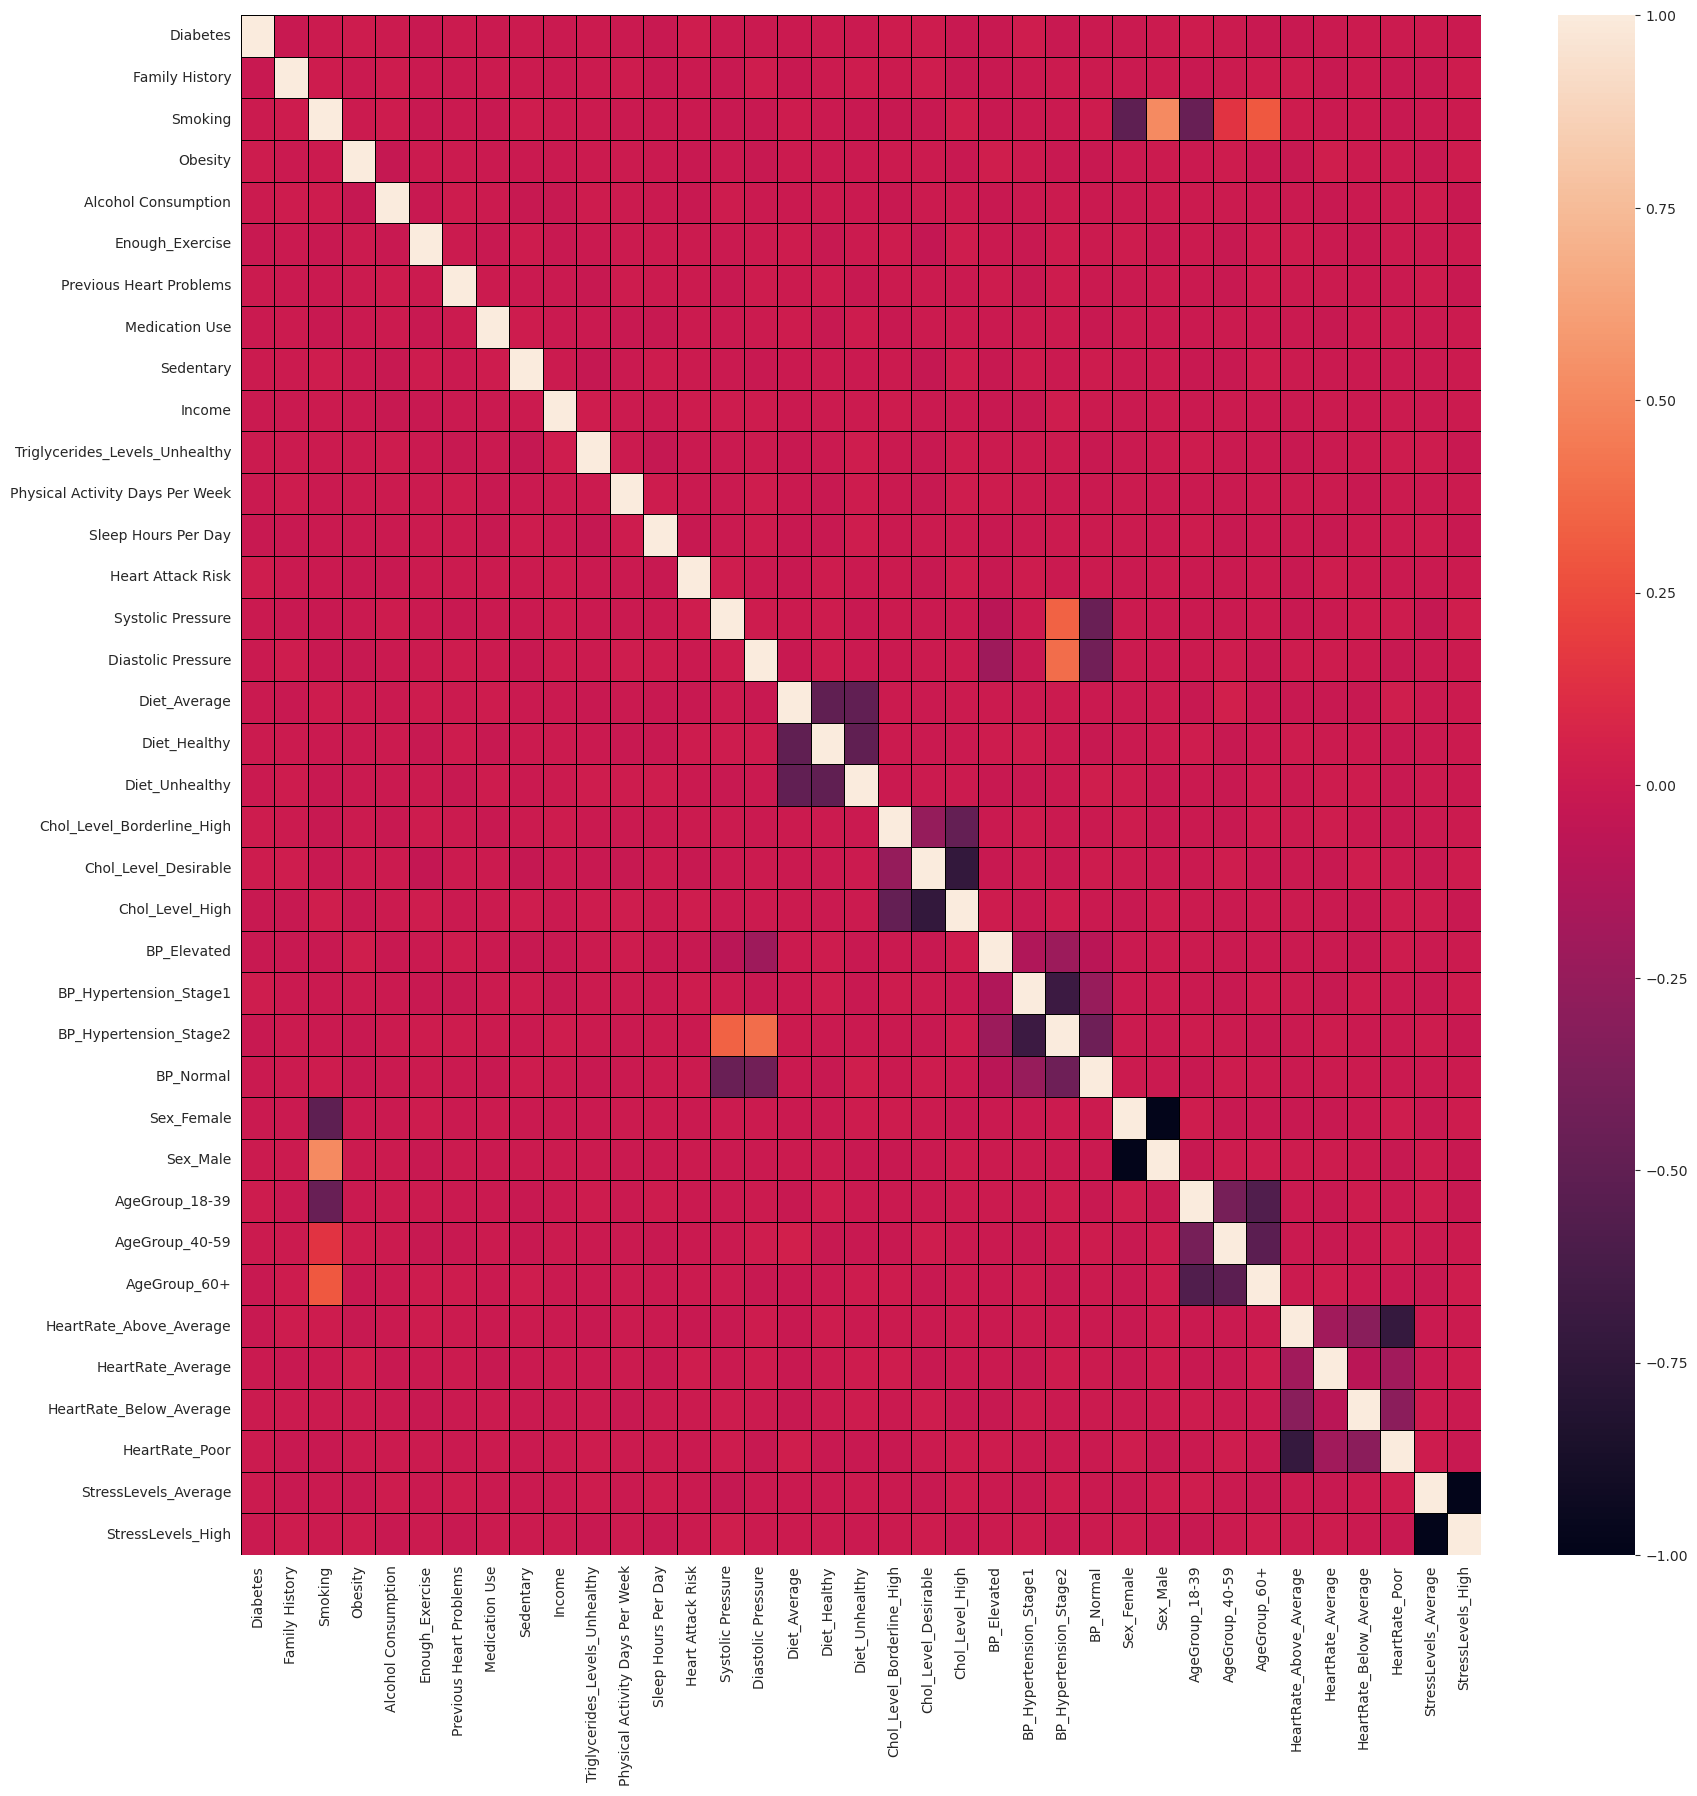

In [839]:
# Correlation between variables (This might need fixing due to the large dataset: Possible Solution, make it only for a subset of dataset)

fig = plt.figure(figsize=(20,20))
correlation_matrix = heartAtk_clean_finalVersion.corr(method="pearson")
sns.heatmap(correlation_matrix, linecolor='black', linewidths=0.5)

**Data pre-processing complete.** 

**Feature Importance**

# Data Analysis

**Decision Tree Classifier Method**

In [840]:
X = heartAtk_clean_finalVersion.drop(['Heart Attack Risk'],axis=1) # Input Data
y = heartAtk_clean_finalVersion['Heart Attack Risk'].to_frame() # Target Feature

# Creating testing data and training data.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=2021)

print("The shape of x is %s. The training set has the shape %s and the test set has the shape %s." %(x.shape, x_train.shape, x_test.shape))
print("The shape of y is %s. The training set has the shape %s and the test set has the shape %s." %(y.shape, y_train.shape, y_test.shape))

The shape of x is (8763, 31). The training set has the shape (5695, 31) and the test set has the shape (3068, 31).
The shape of y is (8763, 1). The training set has the shape (5695, 1) and the test set has the shape (3068, 1).


**Hold-Out Validation**

In [841]:
# Instance of the Decision Tree
#classifier = DecisionTreeClassifier(random_state=2021)

# Begin training
#classifier.fit(x_train, y_train)

# Predictions for the function
#predictions = classifier.predict(x_test)

In [842]:
important_features = ['Chol_Level_High','HeartRate_Below_Average','HeartRate_Poor','Medication Use','Sedentary Hours Per Day','BMI',
                    'Triglycerides','Income','Smoking','Alcohol Consumption', 'Diabetes','Family History', 
                    'Obesity', 'AgeGroup_18-39', 'AgeGroup_40-59', 'AgeGroup_60+',
                    'Stress Level', 'Diet_Unhealthy', 'Previous Heart Problems','BP_Hypertension_Stage1','BP_Hypertension_Stage2']

# Extract only the important features from your dataset
X_important = X[important_features]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=2021)

# Initialize the DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="gini", max_depth=10, random_state=2021)

# Fit the classifier on the training data
classifier.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = classifier.feature_importances_

# Print feature importance scores
print("Feature Importances:")
for feature, importance in zip(important_features, feature_importances):
    print(f"{feature}: {importance}")

# Plotting the feature importances
plt.figure(figsize=(10, 8))
plt.bar(range(len(important_features)), feature_importances, align="center")
plt.xticks(range(len(important_features)), important_features, rotation=45,ha="right", fontsize=7)
plt.title("Feature Importances for Emphasized Features")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()
predictions = classifier.predict(X_test)

KeyError: "['Sedentary Hours Per Day', 'BMI', 'Triglycerides', 'Stress Level'] not in index"

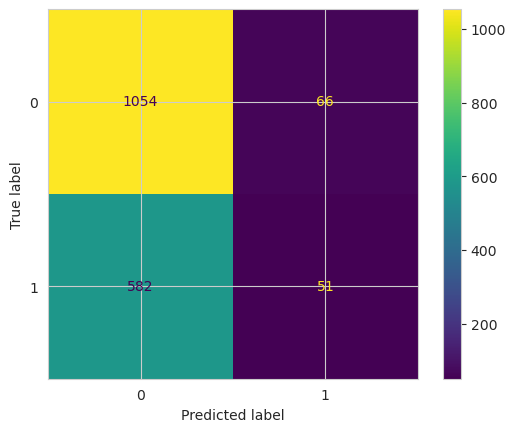

In [ ]:
# And now for the Quality Metrics

# Confusion Matrix

ConfusionMatrixDisplay.from_predictions(y_test, predictions)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy Score: %s" %accuracy)
precision = precision_score(y_test, predictions)
print("Precision Score: %s" %precision)
recall = recall_score(y_test, predictions)
print("Recall Score: %s" %recall)

Accuracy Score: 0.6303479749001711
Precision Score: 0.4358974358974359
Recall Score: 0.08056872037914692


ROC and AUC Score: 0.5108200744752878


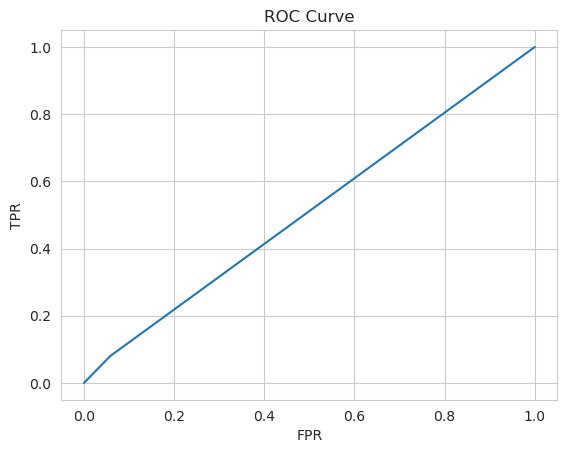

In [ ]:
roc_auc = roc_auc_score(y_test,predictions)
print("ROC and AUC Score: %s" %roc_auc)

fpr, tpr, _ = roc_curve(y_test, predictions)
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [ ]:
f1 = f1_score(y_test, predictions)
fbeta = fbeta_score(y_test, predictions, beta=0.5)

print("F1 Score: %s" %f1)
print("FBeta Score: %s" %fbeta)

F1 Score: 0.13599999999999998
FBeta Score: 0.23160762942779292


**Cross Validation(k = 10)**

In [ ]:
# And now for the Module Validation

classifier2 = DecisionTreeClassifier(criterion = "gini", max_depth=10, random_state=2021)
scores = cross_val_score(classifier2,x,y,cv = 10)
print(scores)
print("Accuracy of %0.2f with a standard deviation of %0.2f" %(scores.mean(), scores.std()))

[0.63283922 0.60433295 0.59179019 0.59474886 0.60273973 0.60273973
 0.62328767 0.62214612 0.64269406 0.63127854]
Accuracy of 0.61 with a standard deviation of 0.02


**Conclusions so far:**

**Logistic Regression Method**

In [ ]:
x = heartAtk_clean_finalVersion.drop('Heart Attack Risk',axis=1)
y = heartAtk_clean_finalVersion['Heart Attack Risk']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=101)

/home/mirtilo/miniconda3/envs/DAApl/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mirtilo/miniconda3/envs/DAApl/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mirtilo/miniconda3/envs/DAApl/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Heart Attack Risk', ylabel='count'>

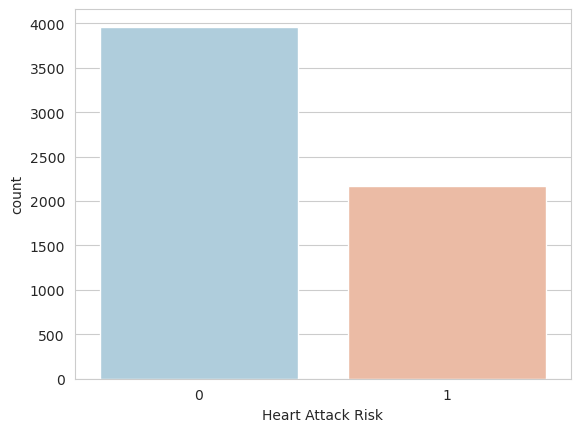

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Heart Attack Risk', data = pd.DataFrame(y_train,columns=['Heart Attack Risk']),palette='RdBu_r')

/home/mirtilo/miniconda3/envs/DAApl/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mirtilo/miniconda3/envs/DAApl/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mirtilo/miniconda3/envs/DAApl/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Heart Attack Risk', ylabel='count'>

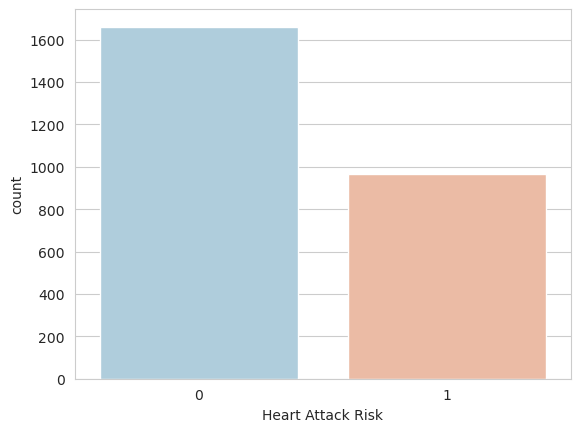

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Heart Attack Risk', data = pd.DataFrame(y_test,columns=['Heart Attack Risk']),palette='RdBu_r')

In [ ]:
starttime = time.process_time()

logisticModel1 = LogisticRegression(random_state=2022, solver='lbfgs')
print(logisticModel1)
logisticModel1.fit(x_train,y_train)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

predictionsLogisticModel1 = logisticModel1.predict(x_test)

LogisticRegression(random_state=2022)
Time spent: 0.45208259200001066 seconds


In [ ]:
starttime = time.process_time()

logisticModel2 = LogisticRegression(random_state=2022, solver='liblinear')
print(logisticModel1)
logisticModel2.fit(x_train,y_train)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

predictionsLogisticModel2 = logisticModel2.predict(x_test)

LogisticRegression(random_state=2022)
Time spent: 0.2625905479999915 seconds


In [ ]:
print("With solver 'lbfgs' : \n",classification_report(y_test,predictionsLogisticModel1,zero_division=1))
print("With solver 'liblinear' : \n",classification_report(y_test,predictionsLogisticModel2,zero_division=1))

With solver 'lbfgs' : 
               precision    recall  f1-score   support

           0       0.63      1.00      0.77      1661
           1       1.00      0.00      0.00       968

    accuracy                           0.63      2629
   macro avg       0.82      0.50      0.39      2629
weighted avg       0.77      0.63      0.49      2629

With solver 'liblinear' : 
               precision    recall  f1-score   support

           0       0.63      1.00      0.77      1661
           1       1.00      0.00      0.00       968

    accuracy                           0.63      2629
   macro avg       0.82      0.50      0.39      2629
weighted avg       0.77      0.63      0.49      2629



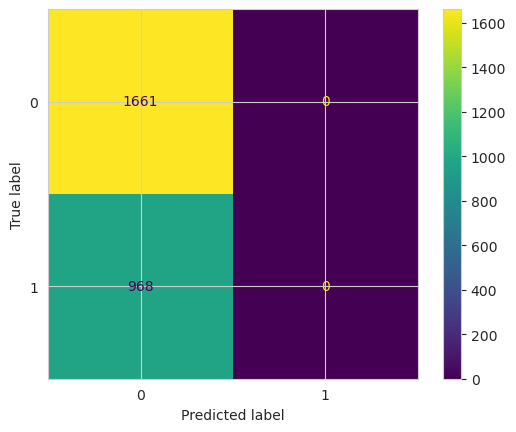

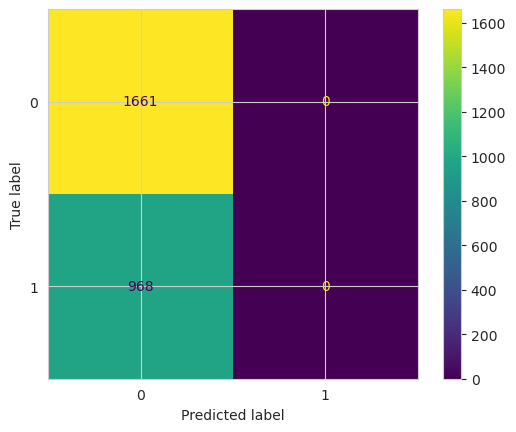

In [ ]:
# These confusion matrixes are...confusing. I don't understand how this is happening. We will need to look into it.

ConfusionMatrixDisplay.from_predictions(y_test,predictionsLogisticModel1)
ConfusionMatrixDisplay.from_predictions(y_test,predictionsLogisticModel2)
plt.show()

**Conclusions so far:**